In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) # untar is unzip
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos')

In [3]:
data_dir

WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos')

In [4]:
os.listdir('C:/Users/Asus/.keras/datasets/flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [5]:
os.listdir('C:/Users/Asus/.keras/datasets/flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [6]:
os.listdir('C:/Users/Asus/.keras/datasets/flower_photos/tulips/')

['100930342_92e8746431_n.jpg',
 '10094729603_eeca3f2cb6.jpg',
 '10094731133_94a942463c.jpg',
 '10128546863_8de70c610d.jpg',
 '10163955604_ae0b830975_n.jpg',
 '10164073235_f29931d91e.jpg',
 '10686568196_b1915544a8.jpg',
 '107693873_86021ac4ea_n.jpg',
 '10791227_7168491604.jpg',
 '10995953955_089572caf0.jpg',
 '110147301_ad921e2828.jpg',
 '112334842_3ecf7585dd.jpg',
 '112428665_d8f3632f36_n.jpg',
 '112428919_f0c5ad7d9d_n.jpg',
 '112650879_82adc2cc04_n.jpg',
 '112651128_7b5d39a346_m.jpg',
 '112951022_4892b1348b_n.jpg',
 '112951086_150a59d499_n.jpg',
 '113291410_1bdc718ed8_n.jpg',
 '113902743_8f537f769b_n.jpg',
 '113960470_38fab8f2fb_m.jpg',
 '11441893003_ab83672800.jpg',
 '11614202956_1dcf1c96a1.jpg',
 '116343334_9cb4acdc57_n.jpg',
 '11746080_963537acdc.jpg',
 '11746276_de3dec8201.jpg',
 '11746367_d23a35b085_n.jpg',
 '11746452_5bc1749a36.jpg',
 '11746548_26b3256922_n.jpg',
 '12024561754_ce9667e4dc_n.jpg',
 '12025038686_7f10811d4b_n.jpg',
 '12025042086_78bafc0eb6_n.jpg',
 '12163418275_bd6a

In [7]:
len(os.listdir('C:/Users/Asus/.keras/datasets/flower_photos/tulips/'))

799

In [8]:
len(os.listdir('C:/Users/Asus/.keras/datasets/flower_photos/sunflowers'))

699

In [9]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [10]:
data_dir

WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos')

In [11]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/Asus/.keras/datasets/flower_ph

In [12]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [13]:
roses = list(data_dir.glob('roses/*.jpg'))

In [14]:
roses[0]

WindowsPath('C:/Users/Asus/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

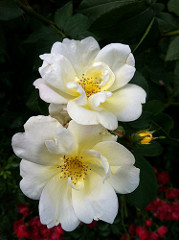

In [15]:
PIL.Image.open(str(roses[0]))

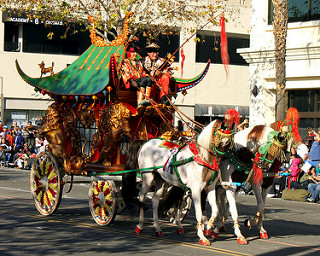

In [16]:
PIL.Image.open(str(roses[20]))

In [17]:
from keras.preprocessing.image import load_img,img_to_array,array_to_img

In [18]:
tulip1 = load_img('C:/Users/Asus/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg')

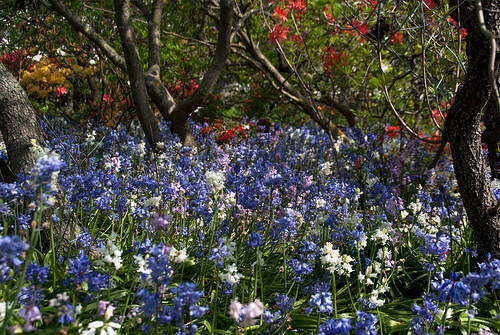

In [19]:
tulip1

In [20]:
IMAGE_SIZE = [224,224]

In [21]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [22]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=64,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMAGE_SIZE),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [23]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [24]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [25]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=64,
                                                directory=data_dir,
                                                target_size=(IMAGE_SIZE),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [26]:
val_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [27]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],
            weights = "imagenet",
            include_top = False)

In [28]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
for layer in vgg.layers:
    layer.trainable = False

In [30]:
x = Flatten()(vgg.output)
prediction = Dense(5,activation='softmax')(x)

In [31]:
model = Model(inputs=vgg.input,outputs=prediction)

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model.fit(train_data_gen,
                    validation_data=val_data_gen,
                    epochs=20)

Epoch 1/20
46/46 [==============================] - 1434s 31s/step - loss: 1.1313 - accuracy: 0.5709 - val_loss: 0.6506 - val_accuracy: 0.7592
Epoch 2/20
46/46 [==============================] - 1328s 29s/step - loss: 0.6977 - accuracy: 0.7496 - val_loss: 0.6273 - val_accuracy: 0.7839
Epoch 3/20
46/46 [==============================] - 1328s 29s/step - loss: 0.6481 - accuracy: 0.7639 - val_loss: 0.5291 - val_accuracy: 0.8140
Epoch 4/20
46/46 [==============================] - 1319s 29s/step - loss: 0.5958 - accuracy: 0.7897 - val_loss: 0.5684 - val_accuracy: 0.8003
Epoch 5/20
46/46 [==============================] - 1323s 29s/step - loss: 0.5435 - accuracy: 0.8027 - val_loss: 0.5491 - val_accuracy: 0.8071
Epoch 6/20
46/46 [==============================] - 1325s 29s/step - loss: 0.5413 - accuracy: 0.7999 - val_loss: 0.5673 - val_accuracy: 0.8126
Epoch 7/20
46/46 [==============================] - 1350s 29s/step - loss: 0.5576 - accuracy: 0.7945 - val_loss: 0.6668 - val_accuracy: 0.7811

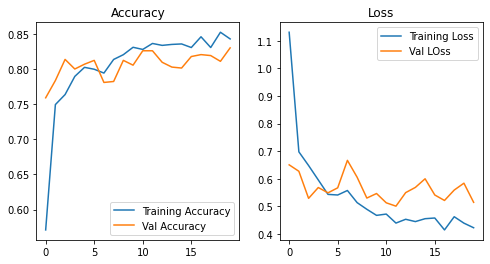

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()